In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from pathlib import Path
import json

In [5]:
p = Path(r'C:\Users\Vikas\Downloads\customersdata.json')

# read json
dataset = []
for p in open(r'C:\Users\Vikas\Downloads\customersdata.json', 'r'):
    dataset.append(json.loads(p))
    
    
df = json_normalize(dataset)

# save to csv
df.to_csv(r'C:\Users\Vikas\Downloads\cusfra.csv', index=False, encoding='utf-8')

In [6]:
data=pd.read_csv(r'C:\Users\Vikas\Downloads\cusfra.csv')

In [7]:
data.head()

,customer.customerBillingAddress,customer.customerDevice,customer.customerEmail,customer.customerIPAddress,customer.customerPhone,fraudulent,orders,paymentMethods,transactions
0,"5493 Jones Islands\r\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"8478 Sean Ridges Apt. 441\r\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"7769 Elizabeth Bridge Apt. 343\r\nNortonstad, ...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,148 Russell Lodge Apt. 445\r\nPort Jennifersid...,j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


In [18]:
data.shape

(168, 9)

In [8]:
data= data.rename(columns={'customer.customerBillingAddress': 'customerBillingAddress', 'customer.customerDevice': 'customerDevice','customer.customerEmail':'customerEmail','customer.customerIPAddress':'customerIPAddress','customer.customerPhone':'customerPhone'})


In [9]:
data.head(2)

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent,orders,paymentMethods,transactions
0,"5493 Jones Islands\r\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."


In [10]:
#missing value checking
data.isnull().sum()

customerBillingAddress    0
customerDevice            0
customerEmail             0
customerIPAddress         0
customerPhone             0
fraudulent                0
orders                    0
paymentMethods            0
transactions              0
dtype: int64

In [11]:
df['fraudulent'].value_counts()

False    107
True      61
Name: fraudulent, dtype: int64

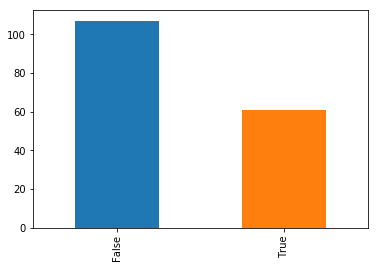

In [12]:
df['fraudulent'].value_counts().plot(kind='bar')

In [ ]:
target='fraudulent'
predictors=['customerDevice',customerIPAddress
]

In [15]:
data[data['customerIPAddress']=='219.173.211.202']

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent,orders,paymentMethods,transactions
1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."


In [16]:
#clean duplicate email
data_clean = data.drop_duplicates(subset='customerEmail')
data_clean.shape

(161, 9)